In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter

from itertools import *

import json
import os
import time
import sys
import xmltodict
from datetime import datetime


PATH = "/Users/alexandrarottenkolber/Documents/02_Hertie_School/Master thesis/Master_Thesis_Hertie/data_analysis/01_data/Plenarprotokolle/"

In [206]:
with open(PATH + 'processed/id2speech_concat_POSTag_with_AfD_meta_data.txt', 'r') as infile:
    id2rede_12_19 = json.load(infile)
infile.close()

In [207]:
id2rede_12_19["479132"].keys()

dict_keys(['concatSpeech', 'name', 'date', 'data_ready', 'electoralTerm', 'politicianId', 'firstName', 'lastName', 'positionShort', 'timestamp'])

In [208]:
del id2rede_12_19["0"]

In [209]:
with open(PATH + 'processed/speech2KL_lda_model_concat_POSTag_self_tuned_all_with_AfD_without_very_short_speeches.txt', 'r') as infile:
    speech2KL = json.load(infile)
infile.close()

In [210]:
NamesAndSpeeches = pd.read_csv(PATH + "processed/NamesAndSpeeches_full_with_AfD.csv").drop(columns = ["Unnamed: 0"])

In [211]:
NamesAndSpeeches.head()

,speeches,politicianID,surname_lower_comb,forename_lower_comb,pageid,wikidataid,name
0,"[471526, 479132, 489844]",11000246.0,brandt,willy,1518001.0,Q2514,Willy Brandt
1,"[471554, 471574, 471612, 471651, 471680, 47168...",11002287.0,süssmuth,rita,4253.0,Q66286,Rita Süssmuth
2,"[471532, 471825, 471980, 472676, 473851, 47411...",11002354.0,ullmann,wolfgang,300219.0,Q895636,Wolfgang Ullmann
3,"[471527, 471596, 471692, 473651, 479473, 50886...",11000418.0,dregger,alfred,73446.0,Q65389,Alfred Dregger
4,"[471536, 471967, 472560, 473468, 473996, 47411...",11000891.0,heuer,uwe-jens,1097338.0,Q1594398,Uwe-Jens Heuer


In [212]:
len(NamesAndSpeeches)

2187

In [304]:
NamesAndSpeeches[NamesAndSpeeches["wikidataid"] == "Q27975838"]

,speeches,politicianID,surname_lower_comb,forename_lower_comb,pageid,wikidataid,name
1876,"[1000193, 1001634, 1002443, 1004413, 1006873, ...",11004930.0,weidel,alice,9716234.0,Q27975838,Alice Weidel


In [214]:
NamesAndSpeeches[NamesAndSpeeches["wikidataid"] == "Q27975838"]

,speeches,politicianID,surname_lower_comb,forename_lower_comb,pageid,wikidataid,name
1876,"[1000193, 1001634, 1002443, 1004413, 1006873, ...",11004930.0,weidel,alice,9716234.0,Q27975838,Alice Weidel


In [215]:
id2rede_12_19['471583']['electoralTerm']#.keys()

'12'

In [216]:
error = []
for key in id2rede_12_19.keys(): 
    try:
        if id2rede_12_19[key]['name'] == "Alice Weidel": 
            print(key)
        elif id2rede_12_19[key]['name'] == "weidel": 
            print(key)
        elif id2rede_12_19[key]['firstName'] == "alice": 
            print(key)
        elif id2rede_12_19[key]['lastName'] == "weidel": 
            print(key)
            
    except KeyError: 
        error.append(key)

1000193
1001634
1002443
1004413
1006873
1010475
1011305
1013712
1015653
1021772
1023744
1025060
1027674
1032634
1037320
1042282
1044082
1045242
1046243
1050792
1051595
1054623
1058625


In [217]:
id2rede_12_19["1054623"].keys()

dict_keys(['concatSpeech', 'name', 'date', 'data_ready', 'electoralTerm', 'politicianId', 'firstName', 'lastName', 'positionShort', 'timestamp'])

In [218]:
id2rede_12_19["1054623"]['politicianId']

'11004930'

In [219]:
speech2KL["25"]["1054623"]

{'novelty': 2.660255720465394,
 'transience': 2.554340203804844,
 'resonance': 0.10591551666054988}

In [220]:
id2rede_12_19['471583'].keys()

dict_keys(['concatSpeech', 'name', 'date', 'data_ready', 'electoralTerm', 'politicianId', 'firstName', 'lastName', 'positionShort', 'timestamp'])

In [221]:
speech2KL.keys()

dict_keys(['1', '3', '5', '7', '10', '15', '20', '25', '30', '35', '40', '45', '50', '55', '60', '65', '70', '75', '80', '85', '90', '95', '100', '500', '1000'])

In [222]:
def string_to_list(string): 
    if string is np.nan: 
        res = np.nan
    elif type(string) == str: 
        res = string.replace("[", "").replace("]", "").split(", ")
        
    return res

In [223]:
NamesAndSpeeches["speeches"] = NamesAndSpeeches["speeches"].map(lambda x : string_to_list(x))

In [224]:
NamesAndSpeeches.head(3)

,speeches,politicianID,surname_lower_comb,forename_lower_comb,pageid,wikidataid,name
0,"[471526, 479132, 489844]",11000246.0,brandt,willy,1518001.0,Q2514,Willy Brandt
1,"[471554, 471574, 471612, 471651, 471680, 47168...",11002287.0,süssmuth,rita,4253.0,Q66286,Rita Süssmuth
2,"[471532, 471825, 471980, 472676, 473851, 47411...",11002354.0,ullmann,wolfgang,300219.0,Q895636,Wolfgang Ullmann


In [225]:
NamesAndSpeeches_per_WP = pd.DataFrame()

In [226]:
speech_ids = []
WPs = []
date_stamp = []

for key in id2rede_12_19.keys(): 
    speech_ids.append(key)
    WPs.append(id2rede_12_19[key]["electoralTerm"])
    date_stamp.append(id2rede_12_19[key]["date"])

In [227]:
len(speech_ids), len(WPs), len(date_stamp) #(121038, 121038)

(122934, 122934, 122934)

In [228]:
speeches_and_WPs = pd.DataFrame(list(zip(speech_ids, WPs, date_stamp)), columns =['speeches', "WPs", "date"])

In [229]:
speeches_and_WPs

,speeches,WPs,date
0,471526,12,1990-12-20
1,471554,12,1990-12-20
2,471532,12,1990-12-20
3,471527,12,1990-12-20
4,471536,12,1990-12-20
...,...,...,...
122929,2066565,19,2021-09-06
122930,2066537,19,2021-09-06
122931,2066541,19,2021-09-06
122932,2066520,19,2021-09-06


In [230]:
#id2rede_12_19["1066606"]

In [231]:
for speech in NamesAndSpeeches["speeches"][NamesAndSpeeches["wikidataid"] == "Q2514"][0]: 
    print(speech)

471526
479132
489844


In [232]:
NamesAndSpeeches["speeches"][NamesAndSpeeches["wikidataid"] == "Q2514"]

0    [471526, 479132, 489844]
Name: speeches, dtype: object

In [233]:
NamesAndSpeeches["wikidataid"][1]

'Q66286'

In [234]:
NamesAndSpeeches.columns

Index(['speeches', 'politicianID', 'surname_lower_comb', 'forename_lower_comb',
       'pageid', 'wikidataid', 'name'],
      dtype='object')

In [235]:
#NamesAndSpeeches["speeches"][NamesAndSpeeches["wikidataid"] == ID]#[0]

In [236]:
list(NamesAndSpeeches["speeches"][NamesAndSpeeches["wikidataid"] == "Q20645389"])[0] is np.nan #True

False

In [237]:
speech2wikidataid = {}

for ID in list(NamesAndSpeeches["wikidataid"]): 
    
    if list(NamesAndSpeeches["speeches"][NamesAndSpeeches["wikidataid"] == ID])[0] is np.nan: 
        pass
    else:
        for speech in list(NamesAndSpeeches["speeches"][NamesAndSpeeches["wikidataid"] == ID])[0]: 
            speech2wikidataid[speech] = ID

In [238]:
len(speech2wikidataid) #116643

118363

In [239]:
def apply_dic_mapping(item): 
    if item in speech2wikidataid.keys(): 
        res = speech2wikidataid[item]
        
    else: 
        res = np.nan
        
    return res

In [240]:
speeches_and_WPs["wikidataid"] = speeches_and_WPs["speeches"].map(lambda x : apply_dic_mapping(x))

In [241]:
speeches_and_WPs[speeches_and_WPs["wikidataid"].isna() == True]

,speeches,WPs,date,wikidataid
20,471571,12,1991-01-14,NaN
21,471573,12,1991-01-14,NaN
31,471603,12,1991-01-17,NaN
32,471609,12,1991-01-17,NaN
37,471616,12,1991-01-18,NaN
...,...,...,...,...
122897,2066462,19,2021-08-24,NaN
122899,2066517,19,2021-09-06,NaN
122902,2066538,19,2021-09-06,NaN
122932,2066520,19,2021-09-06,NaN


In [242]:
with open(PATH + 'processed/speech2KL_WP19.txt', 'r') as infile: 
    speech2KL_WP19 = json.load(infile)
infile.close()

In [243]:
speeches_and_WPs[speeches_and_WPs["speeches"] == '1066506']

,speeches,WPs,date,wikidataid


In [244]:
list(speeches_and_WPs["speeches"])[-30]

'2066506'

In [245]:
speech2KL_WP19["10"]['1066506']

{'novelty': 2.213904107861204,
 'transience': 1.8539109033568522,
 'resonance': 0.3599932045043517}

In [246]:
novelty = []
transience = []
resonance = []
window = 25

no_value = []

ls_speeches = list(speeches_and_WPs["speeches"])

for i in range(len(ls_speeches)): 
    #if speech in speech2KL_WP19[str(window)].keys():
    #    if "novelty" in speech2KL_WP19[str(window)][speech].keys():
    #        novelty.append(speech2KL_WP19[str(window)][speech]["novelty"])
    #    else:
    #        novelty.append(np.nan)
    #        
    #    if "transience" in speech2KL_WP19[str(window)][speech].keys():
    #        transience.append(speech2KL_WP19[str(window)][speech]["transience"])
    #    else: 
    #        transience.append(np.nan)    
    #        
    #    if "resonance" in speech2KL_WP19[str(window)][speech].keys():
    #        resonance.append(speech2KL_WP19[str(window)][speech]["resonance"])
    #    else: 
    #        resonance.append(np.nan) 
    
    if ls_speeches[i] in speech2KL[str(window)].keys():
        if "novelty" in speech2KL[str(window)][ls_speeches[i]].keys():
            novelty.append(speech2KL[str(window)][ls_speeches[i]]["novelty"])
        else: 
            print(i)
            novelty.append(np.nan)
                
        if "transience" in speech2KL[str(window)][ls_speeches[i]].keys():
            transience.append(speech2KL[str(window)][ls_speeches[i]]["transience"])
        else: 
            transience.append(np.nan)    
            
        if "resonance" in speech2KL[str(window)][ls_speeches[i]].keys():
            resonance.append(speech2KL[str(window)][ls_speeches[i]]["resonance"])
        else: 
            resonance.append(np.nan)  
            
    else: 
        no_value.append(i)
        novelty.append(np.nan)
        transience.append(np.nan)
        resonance.append(np.nan)

In [247]:
len(transience), len(no_value) #(121038, 2984)

(122934, 2561)

In [248]:
len(speeches_and_WPs)

122934

In [249]:
speeches_and_WPs["novelty"] = pd.Series(novelty)
speeches_and_WPs["transience"] = pd.Series(transience)
speeches_and_WPs["resonance"] = pd.Series(resonance)

In [250]:
speeches_and_WPs #121038 rows × 7 columns

,speeches,WPs,date,wikidataid,novelty,transience,resonance
0,471526,12,1990-12-20,Q2514,2.613467,2.524375,0.089092
1,471554,12,1990-12-20,Q66286,3.038764,3.269209,-0.230445
2,471532,12,1990-12-20,Q895636,3.009644,3.468754,-0.459110
3,471527,12,1990-12-20,Q65389,3.212199,3.226515,-0.014315
4,471536,12,1990-12-20,Q1594398,3.773353,3.857674,-0.084320
...,...,...,...,...,...,...,...
122929,2066565,19,2021-09-06,Q40998965,NaN,NaN,NaN
122930,2066537,19,2021-09-06,Q18169686,NaN,NaN,NaN
122931,2066541,19,2021-09-06,Q15606894,NaN,NaN,NaN
122932,2066520,19,2021-09-06,NaN,NaN,NaN,NaN


In [251]:
speeches_and_WPs.head(5)

,speeches,WPs,date,wikidataid,novelty,transience,resonance
0,471526,12,1990-12-20,Q2514,2.613467,2.524375,0.089092
1,471554,12,1990-12-20,Q66286,3.038764,3.269209,-0.230445
2,471532,12,1990-12-20,Q895636,3.009644,3.468754,-0.459110
3,471527,12,1990-12-20,Q65389,3.212199,3.226515,-0.014315
4,471536,12,1990-12-20,Q1594398,3.773353,3.857674,-0.084320


In [252]:
NamesAndSpeeches.columns

Index(['speeches', 'politicianID', 'surname_lower_comb', 'forename_lower_comb',
       'pageid', 'wikidataid', 'name'],
      dtype='object')

In [253]:
NamesWPSpeeches = pd.merge(speeches_and_WPs, NamesAndSpeeches[['politicianID', 'surname_lower_comb', 'forename_lower_comb',
       'pageid', 'wikidataid', 'name']], how = "left", left_on=["wikidataid"], right_on=["wikidataid"])

In [254]:
NamesWPSpeeches = NamesWPSpeeches.rename(columns = {"speeches" : "speech"})

In [255]:
NamesWPSpeeches.head(5)

,speech,WPs,date,wikidataid,novelty,transience,resonance,politicianID,surname_lower_comb,forename_lower_comb,pageid,name
0,471526,12,1990-12-20,Q2514,2.613467,2.524375,0.089092,11000246.0,brandt,willy,1518001.0,Willy Brandt
1,471554,12,1990-12-20,Q66286,3.038764,3.269209,-0.230445,11002287.0,süssmuth,rita,4253.0,Rita Süssmuth
2,471532,12,1990-12-20,Q895636,3.009644,3.468754,-0.459110,11002354.0,ullmann,wolfgang,300219.0,Wolfgang Ullmann
3,471527,12,1990-12-20,Q65389,3.212199,3.226515,-0.014315,11000418.0,dregger,alfred,73446.0,Alfred Dregger
4,471536,12,1990-12-20,Q1594398,3.773353,3.857674,-0.084320,11000891.0,heuer,uwe-jens,1097338.0,Uwe-Jens Heuer


In [256]:
NamesWPSpeeches["year"] = NamesWPSpeeches["date"].map(lambda x: datetime.strptime(x, '%Y-%m-%d').year)
NamesWPSpeeches["month"] = NamesWPSpeeches["date"].map(lambda x: datetime.strptime(x, '%Y-%m-%d').month)

In [257]:
NamesWPSpeeches.head(5)

,speech,WPs,date,wikidataid,novelty,transience,resonance,politicianID,surname_lower_comb,forename_lower_comb,pageid,name,year,month
0,471526,12,1990-12-20,Q2514,2.613467,2.524375,0.089092,11000246.0,brandt,willy,1518001.0,Willy Brandt,1990,12
1,471554,12,1990-12-20,Q66286,3.038764,3.269209,-0.230445,11002287.0,süssmuth,rita,4253.0,Rita Süssmuth,1990,12
2,471532,12,1990-12-20,Q895636,3.009644,3.468754,-0.459110,11002354.0,ullmann,wolfgang,300219.0,Wolfgang Ullmann,1990,12
3,471527,12,1990-12-20,Q65389,3.212199,3.226515,-0.014315,11000418.0,dregger,alfred,73446.0,Alfred Dregger,1990,12
4,471536,12,1990-12-20,Q1594398,3.773353,3.857674,-0.084320,11000891.0,heuer,uwe-jens,1097338.0,Uwe-Jens Heuer,1990,12


In [259]:
NamesWPSpeeches.to_csv(PATH + "./processed/NamesWPSpeeches_with_AfD.csv")

In [260]:
id2rede_12_19['471526'].keys() #dict_keys(['concatSpeech', 'name', 'date', 'data_ready', 'electoralTerm', 'firstName', 'lastName', 'politicianId', 'positionShort', 'positionLong', 'date_control', 'timestamp'])

dict_keys(['concatSpeech', 'name', 'date', 'data_ready', 'electoralTerm', 'politicianId', 'firstName', 'lastName', 'positionShort', 'timestamp'])

In [261]:
NamesWPSpeeches["date"][10]

'1990-12-20'

In [262]:
speeches_and_WPs[speeches_and_WPs["WPs"] == "19"].tail(5)#(30) 

,speeches,WPs,date,wikidataid,novelty,transience,resonance
122929,2066565,19,2021-09-06,Q40998965,NaN,NaN,NaN
122930,2066537,19,2021-09-06,Q18169686,NaN,NaN,NaN
122931,2066541,19,2021-09-06,Q15606894,NaN,NaN,NaN
122932,2066520,19,2021-09-06,NaN,NaN,NaN,NaN
122933,2066606,19,2021-09-06,NaN,NaN,NaN,NaN


In [263]:
NamesWPSpeeches[NamesWPSpeeches["speech"] == '1066516']

,speech,WPs,date,wikidataid,novelty,transience,resonance,politicianID,surname_lower_comb,forename_lower_comb,pageid,name,year,month


In [264]:
#speech2KL["500"]

In [265]:
[list(speech2KL_WP19["100"].keys())[-1]]

['1066253']

In [266]:
list(speech2KL_WP19["25"].keys())[-1]

'1066516'

In [267]:
speech2KL_WP19["25"]['1063071']

{'novelty': 2.4922529010656316,
 'transience': 2.806568976607826,
 'resonance': -0.31431607554219454}

In [269]:
#speech2KL["25"]["1063071"]

In [270]:
speeches_and_WPs.columns # DATE IS MISSING!!!!!!!

Index(['speeches', 'WPs', 'date', 'wikidataid', 'novelty', 'transience',
       'resonance'],
      dtype='object')

In [271]:
speeches_and_WPs[speeches_and_WPs["date"] == '2021-05-06']

,speeches,WPs,date,wikidataid,novelty,transience,resonance
121665,1060406,19,2021-05-06,Q65126,2.679382,2.976706,-0.297323
121666,1060623,19,2021-05-06,Q2590313,3.781264,3.646506,0.134759
121667,1060590,19,2021-05-06,Q1889410,3.451854,3.537038,-0.085183
121668,1060591,19,2021-05-06,Q15433815,2.709636,2.637204,0.072432
121669,1060374,19,2021-05-06,Q1581364,2.626677,3.011960,-0.385283
...,...,...,...,...,...,...,...
121819,1060559,19,2021-05-06,Q39678866,2.329983,2.506201,-0.176218
121820,1060669,19,2021-05-06,Q2080285,3.341758,3.534447,-0.192690
121821,1060501,19,2021-05-06,Q40998580,2.591633,2.651798,-0.060165
121822,1060553,19,2021-05-06,Q38504341,2.973285,2.903832,0.069452


In [272]:
#id2rede

In [273]:
speeches_and_KL_19 = pd.read_csv(PATH + "./processed/speeches_and_KL_19.csv").rename(columns = {"Unnamed: 0": "speeches"})

In [274]:
speeches_and_KL_19.tail()

,speeches,novelty,transience,resonance
19136,1066543,2.627851,2.967004,-0.339153
19137,1066550,2.267331,2.578270,-0.310940
19138,1066552,2.445844,2.681773,-0.235928
19139,1066554,2.325480,2.468612,-0.143131
19140,1066556,2.638225,3.201299,-0.563074


In [275]:
with open(PATH + 'processed/speech2KL_WP19.txt', 'r') as infile: 
    speech2KL_WP19 = json.load(infile)
infile.close()

In [276]:
speech2KL_WP19.keys()

dict_keys(['5', '7', '10', '25', '100'])

In [277]:
NamesWPSpeeches.columns

Index(['speech', 'WPs', 'date', 'wikidataid', 'novelty', 'transience',
       'resonance', 'politicianID', 'surname_lower_comb',
       'forename_lower_comb', 'pageid', 'name', 'year', 'month'],
      dtype='object')

# add Party

In [278]:
party_dic = {'BÜNDNIS 90/DIE GRÜNEN': 'BÜNDNIS 90/DIE GRÜNEN', 
             'PDS': 'PDS', 
             'CDU': "CDU/CSU", 
             'SPD': 'SPD', 
             'FDP': 'FDP', 
             'CSU': "CDU/CSU",
             'DIE LINKE.': 'DIE LINKE.', 
             'Die Linke.': 'DIE LINKE.',
             'PDS/LL': 'PDS', 
             'Plos': 'Parteilos', 
             'AfD': 'AfD', 
            "CDU/CSU" : "CDU/CSU", 
            'Parteilos': 'Parteilos'}

In [279]:
MissingName2Party = {'Otto Graf Lambsdorff': "FDP", 
                     'Jörg Wolfgang Ganschow': "FDP", 
                     'Jürgen Möllemann': "FDP", 
                     'Rainer Ortleb': "FDP", 
                     'Harald B. Schäfer': "SPD", 
                     'Joachim Graf von Schönburg-Glauchau': "CDU", 
                     'Peter Reuschenbach': "SPD", 
                     'Uwe Lühr': "FDP", 
                     'Cornelia von Teichman und Logischen': "FDP", 
                     'Heinrich Leonhard Kolb': "FDP", 
                     'Verena Wohlleben': "SPD", 
                     'Lieselott Blunck': "SPD", 
                     'Kurt Rossmanith': "CSU", 
                     'Hans H. Gattermann': "FDP", 
                     'Karsten Voigt': "SPD", 
                     'Gerhard O. Pfeffermann': "CDU",  
                     'Ina Albowitz': "FDP", 
                     'Petra Bläss': "PDS", 
                     'Lutz Stavenhagen': "CDU", 
                     'Ferdinand Tillmann': "CDU", 
                     'Claudia Nolte': "CDU", 
                     'Gunter Weißgerber': "SPD", 
                     'Peter Paterna': "SPD", 
                     'Ursula Lehr': "CDU", 
                     'Klaus Lippold': "CDU", 
                     'Hans-Werner Müller': "CDU", 
                     'Roswitha Verhülsdonk': "CDU", 
                     'Ursula Seiler-Albring': "FDP", 
                     'Karl-Heinz Schröter': "SPD", 
                     'Herbert Meißner': "SPD", 
                     'Hedda Meseke': "CDU", 
                     'Erich G. Fritz': "CDU", 
                     'Heinz-Dieter Hackel': "FDP", 
                     'Jochen Welt': "SPD", 
                     'Paul Friedhoff': "FDP", 
                     'Hans Georg Wagner': "SPD", 
                     'Peter Harry Carstensen': "CDU", 
                     'Werner Skowron': "CDU", 
                     'Walter Franz Altherr': "CDU", 
                     'Karl Hermann Haack': "SPD", 
                     'Claire Marienfeld': "CDU", 
                     'Werner Schuster': "SPD", 
                     'Klaus-Dieter Uelhoff': "CDU", 
                     'Karl H. Fell': "CDU", 
                     'Erich Maaß': "CDU", 
                     'Hans P. H. Schuster': "FDP", 
                     'Reinhard Meyer zu Bentrup': "CDU", 
                     'Hans A. Engelhard': "FDP", 
                     'Heinrich Graf von Einsiedel': "SPD", 
                     'Gila Altmann': "Bündnis 90/Die Grünen", 
                     'Halo Saibold': "Bündnis 90/Die Grünen", 
                     'Wolfgang Ilte': "SPD", 
                     'Dagmar Wöhrl': "CSU", 
                     'Franz Peter Basten': "CDU", 
                     'Gottfried Tröger': "CDU", 
                     'Wilma Glücklich': "CDU", 
                     'Bernd Klaußner': "CDU", 
                     'Karl A. Lamers': "CDU",  
                     'Ulrike Merten': "SPD", 
                     'Sabine Jünger': "Die Linke.", 
                     'Axel Fischer': "CDU", 
                     'Sylvia Bonitz': "CDU",  
                     'Monika Balt': "PDS", 
                     'René Röspel': "SPD",  
                     'Gudrun Serowiecki': "FDP",  
                     'Melanie Oßwald': "CSU", 
                     'Elvira Drobinski-Weiß': "SPD",  
                     'Jutta Krüger-Jacob': "Bündnis 90/Die Grünen", 
                     'Ursula von der Leyen': "CDU", 
                     'Dorothée Menzner': "Die Linke.",  
                     'Sevim Dağdelen': "Die Linke.", 
                     'Lutz Heilmann': "Die Linke.",  
                     'Andreas Lämmel': "CDU",  
                     'Philipp Mißfelder': "CDU", 
                     'Henning Otte': "CDU",  
                     'Matthias Birkwald': "Die Linke.",  
                     'Hans-Georg von der Marwitz': "CDU", 
                     'Claudia Bögel': "FDP",  
                     'Aydan Özoğuz': "SPD",  
                     'Alexander Neu': "Die Linke.", 
                     'Daniela De Ridder': "SPD", 
                     'Charles M. Huber': "CDU", 
                     'Philipp Graf von und zu Lerchenfeld': "CSU", 
                     'Sylvia Jörrißen': "CDU", 
                     'André Berghegger': "CDU",  
                     'Alexander Graf Lambsdorff': "FDP", 
                     'Amira Mohamed Ali': "Die Linke.",  
                     'Olaf in der Beek': "FDP"}

In [280]:
with open(PATH + 'processed/PolID2info.txt', 'r') as infile:
    PolID2info = json.load(infile)
infile.close()

In [281]:
PolID2info['11000246']["PARTY"]#.keys()

'SPD'

In [282]:
NamesWPSpeeches.columns

Index(['speech', 'WPs', 'date', 'wikidataid', 'novelty', 'transience',
       'resonance', 'politicianID', 'surname_lower_comb',
       'forename_lower_comb', 'pageid', 'name', 'year', 'month'],
      dtype='object')

In [283]:
polIds = NamesWPSpeeches['politicianID']
polNames = NamesWPSpeeches['name']

In [284]:
Parties = []
for i in range(len(polIds)): 
    if np.isnan(polIds[i]) == False:
        if str(int(polIds[i])) in PolID2info.keys():
            if "PARTY" in PolID2info[str(int(polIds[i]))].keys():
                Parties.append(PolID2info[str(int(polIds[i]))]["PARTY"])
            elif type(polNames[i]) == str: 
                Parties.append(MissingName2Party[polNames[i]])
            else: 
                Parties.append(np.nan)
        elif type(polNames[i]) == str: 
                Parties.append(MissingName2Party[polNames[i]])
        else: 
            Parties.append(np.nan)
    elif type(polNames[i]) == str: 
        Parties.append(MissingName2Party[polNames[i]])
    else: 
        Parties.append(np.nan)

KeyError: 'André Hahn'

In [ ]:
type(polNames[121037]) == str, type("Herbert") == str

In [ ]:
len(Parties), len(polIds)

In [ ]:
NamesWPSpeeches["PARTY_temp"] = pd.Series(Parties)

In [ ]:
NamesWPSpeeches["PARTY_temp"].unique()

In [ ]:
NamesWPSpeeches["PARTY"] = NamesWPSpeeches["PARTY_temp"].map(party_dic).fillna(NamesWPSpeeches['PARTY_temp'])

In [ ]:
NamesWPSpeeches["PARTY"].unique()

In [306]:
#NamesWPSpeeches = NamesWPSpeeches.drop(columns = ["PARTY_temp"])

In [186]:
NamesWPSpeeches["PARTY"].head(20)

0                       SPD
1                   CDU/CSU
2     BÜNDNIS 90/DIE GRÜNEN
3                   CDU/CSU
4                       PDS
5                   CDU/CSU
6                       SPD
7                       FDP
8     BÜNDNIS 90/DIE GRÜNEN
9                       SPD
10                      FDP
11                  CDU/CSU
12                      SPD
13                  CDU/CSU
14                      SPD
15                      FDP
16                  CDU/CSU
17                  CDU/CSU
18                      SPD
19                      FDP
Name: PARTY, dtype: object

In [227]:
#len(NamesWPSpeeches[(NamesWPSpeeches["PARTY"].isna()) & (NamesWPSpeeches["name"].isna() == False)]["name"].unique())

In [229]:
#len(NamesWPSpeeches["name"].unique())-len(NamesWPSpeeches[(NamesWPSpeeches["PARTY"].isna()) & (NamesWPSpeeches["name"].isna() == False)]["name"].unique()), len(NamesWPSpeeches[(NamesWPSpeeches["PARTY"].isna()) & (NamesWPSpeeches["name"].isna() == False)]["name"].unique())/len(NamesWPSpeeches["name"].unique())

In [230]:
#MPs_without_party = NamesWPSpeeches[(NamesWPSpeeches["PARTY"].isna()) & (NamesWPSpeeches["name"].isna() == False)]["name"].unique()
#MPs_without_party

In [286]:
NamesWPSpeeches.head(20)

,speech,WPs,date,wikidataid,novelty,transience,resonance,politicianID,surname_lower_comb,forename_lower_comb,pageid,name,year,month
0,471526,12,1990-12-20,Q2514,2.613467,2.524375,0.089092,11000246.0,brandt,willy,1518001.0,Willy Brandt,1990,12
1,471554,12,1990-12-20,Q66286,3.038764,3.269209,-0.230445,11002287.0,süssmuth,rita,4253.0,Rita Süssmuth,1990,12
2,471532,12,1990-12-20,Q895636,3.009644,3.468754,-0.459110,11002354.0,ullmann,wolfgang,300219.0,Wolfgang Ullmann,1990,12
3,471527,12,1990-12-20,Q65389,3.212199,3.226515,-0.014315,11000418.0,dregger,alfred,73446.0,Alfred Dregger,1990,12
4,471536,12,1990-12-20,Q1594398,3.773353,3.857674,-0.084320,11000891.0,heuer,uwe-jens,1097338.0,Uwe-Jens Heuer,1990,12
5,471538,12,1990-12-20,Q90872,3.886377,4.169470,-0.283093,11000230.0,bohl,friedrich,68441.0,Friedrich Bohl,1990,12
6,471540,12,1990-12-20,Q62202,3.652626,3.742193,-0.089567,11002278.0,struck,peter,2775624.0,Peter Struck,1990,12
7,471542,12,1990-12-20,Q1671024,3.591342,4.055185,-0.463842,11002557.0,wolfgramm,torsten,217661.0,Torsten Wolfgramm,1990,12
8,471544,12,1990-12-20,Q1439517,4.003503,4.374980,-0.371477,11001159.0,köppe,ingrid,1139068.0,Ingrid Köppe,1990,12
9,471547,12,1990-12-20,Q1604393,NaN,NaN,NaN,11000127.0,becker,helmuth,394854.0,Helmuth Becker,1990,12


In [305]:
NamesWPSpeeches[NamesWPSpeeches["wikidataid"] == "Q27975838"].tail(80)

,speech,WPs,date,wikidataid,novelty,transience,resonance,politicianID,surname_lower_comb,forename_lower_comb,pageid,name,year,month
101648,1000193,19,2017-11-21,Q27975838,2.953467,2.842333,0.111134,11004930.0,weidel,alice,9716234.0,Alice Weidel,2017,11
102071,1001634,19,2018-01-22,Q27975838,2.515721,2.472006,0.043715,11004930.0,weidel,alice,9716234.0,Alice Weidel,2018,1
102413,1002443,19,2018-02-22,Q27975838,3.003838,2.633588,0.370250,11004930.0,weidel,alice,9716234.0,Alice Weidel,2018,2
102968,1004413,19,2018-03-21,Q27975838,2.469791,2.594199,-0.124408,11004930.0,weidel,alice,9716234.0,Alice Weidel,2018,3
103830,1006873,19,2018-05-16,Q27975838,2.348647,2.426225,-0.077579,11004930.0,weidel,alice,9716234.0,Alice Weidel,2018,5
104960,1010475,19,2018-07-04,Q27975838,2.507970,2.408779,0.099191,11004930.0,weidel,alice,9716234.0,Alice Weidel,2018,7
105211,1011305,19,2018-09-12,Q27975838,1.894511,1.952360,-0.057848,11004930.0,weidel,alice,9716234.0,Alice Weidel,2018,9
105967,1013712,19,2018-10-17,Q27975838,2.932447,2.567365,0.365082,11004930.0,weidel,alice,9716234.0,Alice Weidel,2018,10
106668,1015653,19,2018-11-21,Q27975838,2.577977,2.393274,0.184703,11004930.0,weidel,alice,9716234.0,Alice Weidel,2018,11
108761,1021772,19,2019-03-21,Q27975838,2.867188,2.858462,0.008726,11004930.0,weidel,alice,9716234.0,Alice Weidel,2019,3


In [288]:
NamesWPSpeeches.to_csv(PATH + "./processed/NamesWPSpeeches_withParty.csv")

# Group and save

In [314]:
NamesWPSpeeches_later = NamesWPSpeeches[NamesWPSpeeches["year"] >= 2015].copy()

In [316]:
NamesWPSpeeches_later.head()

,speech,WPs,date,wikidataid,novelty,transience,resonance,politicianID,surname_lower_comb,forename_lower_comb,pageid,name,year,month
90754,810421,18,2015-01-14,Q87642,3.221553,3.354443,-0.132890,11000907.0,hintze,peter,151952.0,Peter Hintze,2015,1
90755,810387,18,2015-01-14,Q67529,3.144743,3.430577,-0.285834,11002630.0,böhmer,maria,156301.0,Maria Böhmer,2015,1
90756,810344,18,2015-01-14,Q103740,3.248926,3.370894,-0.121968,11001023.0,jelpke,ulla,953461.0,Ulla Jelpke,2015,1
90757,810431,18,2015-01-14,Q1522246,2.380810,1.996949,0.383861,11001062.0,kampeter,steffen,174275.0,Steffen Kampeter,2015,1
90758,810416,18,2015-01-14,Q71533,3.242615,3.740040,-0.497425,11002273.0,ströbele,hans-christian,4578948.0,Hans-Christian Ströbele,2015,1


In [317]:
sum(NamesWPSpeeches_later["novelty"].isna() == True)/ len(NamesWPSpeeches_later["novelty"])

0.00826600372902424

In [319]:
NamesWPSpeeches_later[NamesWPSpeeches_later["novelty"].isna() == True]

,speech,WPs,date,wikidataid,novelty,transience,resonance,politicianID,surname_lower_comb,forename_lower_comb,pageid,name,year,month
90940,811141,18,2015-01-28,Q66008,NaN,NaN,NaN,11000305.0,bulmahn,edelgard,1453.0,Edelgard Bulmahn,2015,1
90985,810870,18,2015-01-28,Q14947864,NaN,NaN,NaN,11004248.0,bartke,matthias,7888641.0,Matthias Bartke,2015,1
90986,810858,18,2015-01-28,Q15794282,NaN,NaN,NaN,11004313.0,jantz,christina,7935080.0,Christina Jantz,2015,1
90987,810900,18,2015-01-28,Q15813200,NaN,NaN,NaN,11004370.0,pantel,sylvia,7722346.0,Sylvia Pantel,2015,1
90988,810890,18,2015-01-28,Q57322,NaN,NaN,NaN,11002625.0,beck,volker,116688.0,Volker Beck,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122929,2066565,19,2021-09-06,Q40998965,NaN,NaN,NaN,11004745.0,herbrand,markus,10077271.0,Markus Herbrand,2021,9
122930,2066537,19,2021-09-06,Q18169686,NaN,NaN,NaN,11004938.0,ziemiak,paul,8400888.0,Paul Ziemiak,2021,9
122931,2066541,19,2021-09-06,Q15606894,NaN,NaN,NaN,11004713.0,fahimi,yasmin,8048619.0,Yasmin Fahimi,2021,9
122932,2066520,19,2021-09-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,9


In [290]:
NamesWPSpeeches.columns

Index(['speech', 'WPs', 'date', 'wikidataid', 'novelty', 'transience',
       'resonance', 'politicianID', 'surname_lower_comb',
       'forename_lower_comb', 'pageid', 'name', 'year', 'month'],
      dtype='object')

In [326]:
NamesWPSpeeches_grouped_WP = NamesWPSpeeches_later[['speech', 'WPs', 'wikidataid', 'novelty', 'transience',
       'resonance', 'politicianID', 'name']].groupby(["WPs", "wikidataid", "name", "politicianID"]).mean().reset_index()
NamesWPSpeeches_grouped_year = NamesWPSpeeches_later.groupby(["year", "wikidataid", "name"]).mean().reset_index()
NamesWPSpeeches_grouped_month_year = NamesWPSpeeches_later.groupby(["month", "year", "wikidataid", "name"]).mean().reset_index()
#NamesWPSpeeches_grouped_year_Party = NamesWPSpeeches.groupby(["year", "PARTY"]).mean().reset_index()

In [327]:
sum(NamesWPSpeeches_grouped_year["novelty"].isna() == True)/ len(NamesWPSpeeches_grouped_year["novelty"])

0.0015938069216757742

In [328]:
len(NamesWPSpeeches), len(NamesWPSpeeches_grouped_WP), len(NamesWPSpeeches_grouped_year), len(NamesWPSpeeches_grouped_month_year)
#(121038, 5130, 18326, 219, 79385)

(122934, 1318, 4392, 20471)

In [329]:
NamesWPSpeeches_grouped_WP.head()

,WPs,wikidataid,name,politicianID,novelty,transience,resonance
0,18,Q100797,Florian Pronold,11003612.0,2.883056,2.914870,-0.031814
1,18,Q100986,Dirk Becker,11003736.0,2.852013,2.716966,0.135047
2,18,Q101192,Hans-Peter Bartels,11003031.0,2.700063,2.810514,-0.110451
3,18,Q101504,Klaus-Peter Willsch,11003264.0,2.620152,2.608408,0.011744
4,18,Q101617,Heidrun Bluhm,11003740.0,2.716741,2.595614,0.121127


In [330]:
len(NamesWPSpeeches_grouped_WP) #5130

1318

In [331]:
NamesWPSpeeches_grouped_WP.to_csv(PATH + "./processed/NamesWPSpeeches_grouped_by_IDNameWP_with_AfD_later.csv")
NamesWPSpeeches_grouped_year.to_csv(PATH + "./processed/NamesWPSpeeches_grouped_by_IDNameYear_with_AfD_later.csv")
#NamesWPSpeeches_grouped_year_Party.to_csv(PATH + "./processed/NamesWPSpeeches_grouped_by_YearPARTY_with_AfD.csv")
NamesWPSpeeches_grouped_month_year.to_csv(PATH + "./processed/NamesWPSpeeches_grouped_by_Month_Year_with_AfD_later.csv")

In [296]:
PATH

'/Users/alexandrarottenkolber/Documents/02_Hertie_School/Master thesis/Master_Thesis_Hertie/data_analysis/01_data/Plenarprotokolle/'

In [297]:
NamesWPSpeeches_grouped_year.columns

Index(['year', 'wikidataid', 'name', 'novelty', 'transience', 'resonance',
       'politicianID', 'pageid', 'month'],
      dtype='object')

<AxesSubplot:>

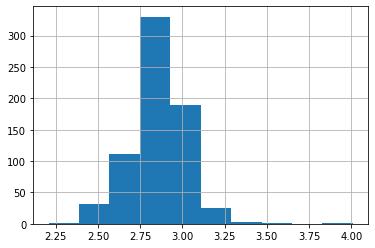

In [298]:
NamesWPSpeeches_grouped_WP['novelty'][NamesWPSpeeches_grouped_WP["WPs"] == "19"].hist()

<AxesSubplot:>

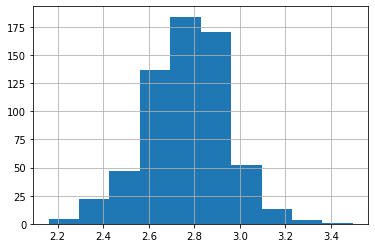

In [299]:
NamesWPSpeeches_grouped_WP['novelty'][NamesWPSpeeches_grouped_WP["WPs"] == "18"].hist()

<AxesSubplot:>

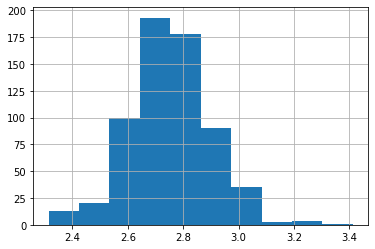

In [300]:
NamesWPSpeeches_grouped_WP['novelty'][NamesWPSpeeches_grouped_WP["WPs"] == "17"].hist()

<AxesSubplot:>

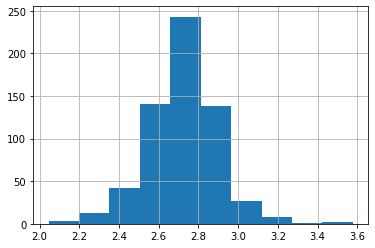

In [301]:
NamesWPSpeeches_grouped_WP['novelty'][NamesWPSpeeches_grouped_WP["WPs"] == "16"].hist()

<AxesSubplot:>

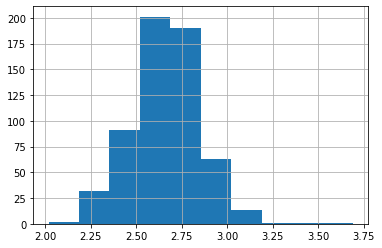

In [302]:
NamesWPSpeeches_grouped_WP['novelty'][NamesWPSpeeches_grouped_WP["WPs"] == "15"].hist()

In [303]:
NamesWPSpeeches_grouped['resonance'][NamesWPSpeeches_grouped["WPs"] == "19"].hist()


NameError: name 'NamesWPSpeeches_grouped' is not defined

<AxesSubplot:>

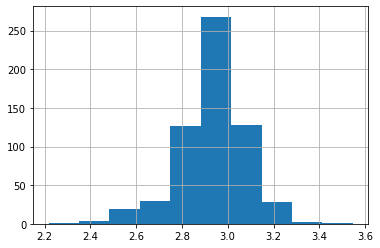

In [121]:
NamesWPSpeeches_grouped['transience'][NamesWPSpeeches_grouped["WPs"] == "19"].hist()

<AxesSubplot:>

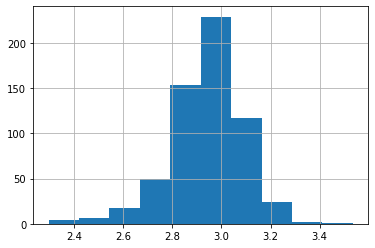

In [343]:
NamesWPSpeeches_grouped['novelty'][NamesWPSpeeches_grouped["WPs"] == "19"].hist()

In [244]:
NamesWPSpeeches_grouped_year_Party.tail(10)

,year,PARTY,novelty,transience,resonance,politicianID,pageid,month
209,2020,DIE LINKE.,3.029498,3.003245,0.026253,1.100397e+07,4.372483e+06,7.042453
210,2020,FDP,3.012242,2.974792,0.037451,1.100443e+07,6.372712e+06,6.864078
211,2020,Parteilos,3.043556,3.103845,-0.060289,1.100426e+07,5.117902e+06,7.300000
212,2020,SPD,2.944036,2.938103,0.005933,1.100411e+07,5.418569e+06,7.040000
213,2021,BÜNDNIS 90/DIE GRÜNEN,2.987454,3.001343,-0.013889,1.100414e+07,4.421144e+06,3.733189
214,2021,CDU/CSU,2.949654,2.961184,-0.011530,1.100417e+07,5.097435e+06,3.691176
215,2021,DIE LINKE.,3.011877,2.977449,0.034428,1.100398e+07,4.385085e+06,3.693095
216,2021,FDP,3.000059,2.971540,0.028519,1.100439e+07,6.318255e+06,3.784884
217,2021,Parteilos,2.929437,2.982874,-0.053437,1.100437e+07,5.610070e+06,3.895833
218,2021,SPD,2.980507,2.961719,0.018788,1.100413e+07,5.531496e+06,3.757241


<AxesSubplot:>

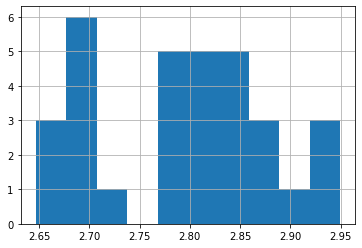

In [245]:
NamesWPSpeeches_grouped_year_Party['novelty'][(NamesWPSpeeches_grouped_year_Party["PARTY"] == "CDU/CSU")].hist()

<AxesSubplot:>

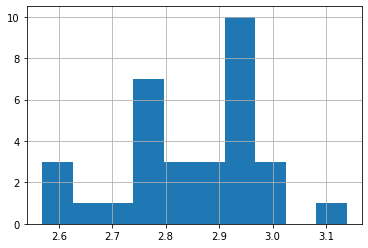

In [246]:
NamesWPSpeeches_grouped_year_Party['novelty'][NamesWPSpeeches_grouped_year_Party["PARTY"] == "BÜNDNIS 90/DIE GRÜNEN"].hist()

In [126]:
#list(speeches_and_WPs["speeches"])


In [317]:
#speech2KL.keys()

In [318]:
#speech2KL['25']

In [319]:
#list(NamesAndSpeeches["speeches"][NamesAndSpeeches["wikidataid"] ==  NamesAndSpeeches["wikidataid"][6]])[0]